To install geopandas: conda install geopandas
Also needed: conda install descartes
In new environment:
conda create gis python==3.8.3
conda activate gis
conda install -y -c conda-forge geopandas jupyterLab
conda remove --force pyproj
In anaconda prompt: conda activate gis

conda list


WHAT I FINALLY DID:
conda create --name thesis geopandas
conda activate thesis
conda list
conda install -c conda-forge folium
conda install rasterio
conda install -c conda-forge earthengine-api

In [2]:
import os 
os.chdir('C:/Users/Lenovo/Desktop/Master_BAOR/MSc Thesis/GitHub/DiCRA_clone')
#conda install -y -c conda-forge geopandas jupyterlab
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import pyproj
import pprint
import folium
from IPython.display import display
import rasterio
#from pyproj import CRS
#crs=CRS('EPSG:4326')
#from pyproj import CRS
#import pyproj 

#proj_4326 = pyproj.Proj("epsg:4326")
#proj_3857 = pyproj.Proj("epsg:3857")
#pyproj.Proj('+init=espg: 3857')


In [3]:
boundaries_df = gpd.read_file('dicra/src/data_preprocessing/tsdm/District_Boundary.shp')
print(boundaries_df.head())

NDV_index = gpd.read_file('C:/Users/Lenovo/Desktop/Master_BAOR/MSc Thesis/dowloaded from DiCRA/NDVI/NDVI_2021/VECTOR/DISTRICT/28-08-2021.geojson')
NDV_index.head()

soil_df = gpd.read_file('C:/Users/Lenovo/Desktop/Master_BAOR/MSc Thesis/dowloaded from DiCRA/SOILM/SOILM_2022/VECTOR/DISTRICT/23-01-2022.geojson')
soil_df.head()

market_yards = pd.read_csv('C:/Users/Lenovo/Desktop/Master_BAOR/MSc Thesis/dowloaded from DiCRA/CP/CP_2022/market_yard_data.csv')
#print(market_yards.head())

relative_wealth = pd.read_csv('C:/Users/Lenovo/Desktop/Master_BAOR/MSc Thesis/GitHub/DiCRA_clone/dicra/analytics/notebooks/relative_wealth_index/data/ind_pak_relative_wealth_index.csv')
#print(relative_wealth.head())

          Area  Shape_Leng     Shape_Area     No_HH      TOT_P     TOT_M  \
0  6974.142517    5.810776  697414.251698  279190.0  1115724.0  555120.0   
1  2853.088839    2.739430  285308.883913  253619.0   985417.0  484079.0   
2  2112.708002    2.828196  211270.800170  131395.0   534991.0  267875.0   
3  4189.022904    4.657889  418902.290394   78239.0   294671.0  146205.0   
4  3701.834985    4.296472  370183.498474  222513.0   972625.0  478389.0   

      TOT_F      P_06     M_06     F_06      P_SC     M_SC     F_SC      P_ST  \
0  560601.0  107326.0  54647.0  52676.0  143482.0  71281.0  72201.0  392034.0   
1  501338.0   93272.0  47890.0  45382.0  164596.0  80254.0  84342.0   23351.0   
2  267116.0   52085.0  26914.0  25171.0  112256.0  56347.0  55909.0   62224.0   
3  148466.0   29144.0  14788.0  14356.0   46473.0  23490.0  22983.0   86352.0   
4  494236.0  111666.0  57528.0  54138.0  153302.0  74133.0  79169.0   81656.0   

       M_ST      F_ST             Dist_Name  \
0  194349

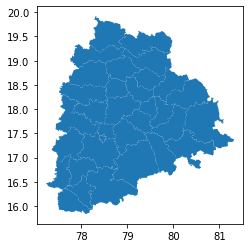

In [4]:
# Viewing a geometry (change the number to see some other district)
boundaries_df.loc[0, 'geometry']
# Gives all latitude, longitude pairs that define the polygon as above
#print(boundaries_df.loc[0, 'geometry'])
boundaries_df.plot()
plt.show()

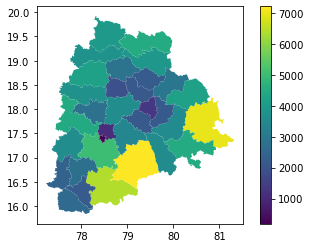

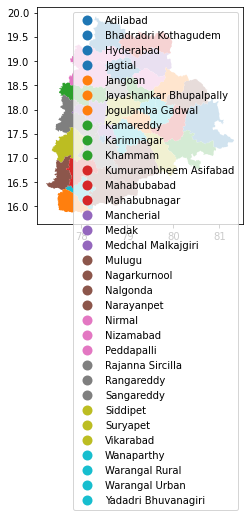

In [5]:
# The colors are based on the size of the area for each district
boundaries_df.plot(column = 'Area', legend = True)
plt.show()
# Each district is given a color
boundaries_df.plot(column = 'Dist_Name', legend = True)
plt.show()

The following code can be used if we would like to plot some other data points over the polygons

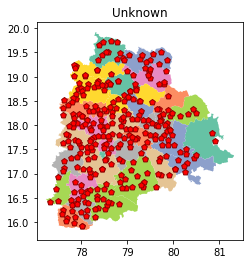

In [6]:
# Plot of the market yards within Telangana
boundaries_df.plot(column = 'Dist_Name', legend = False, cmap = 'Set2')
plt.scatter(market_yards.longitude, market_yards.latitude, marker = 'p', c = 'red', edgecolor = 'darkred')
plt.title('Unknown')
plt.show()

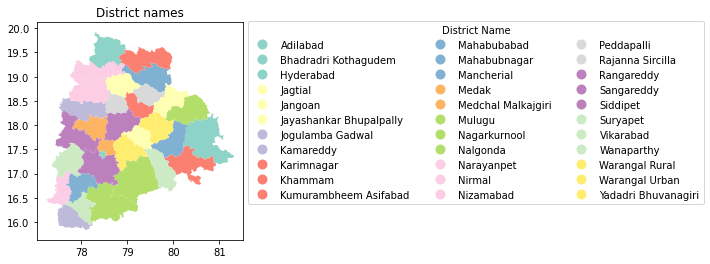

In [7]:
#GeoJSON and plotting with geopandas
leg_kwds = {'title': 'District Name', 'loc': 'upper left', 'bbox_to_anchor': (1,1.03), 'ncol': 3}
boundaries_df.plot(column = 'Dist_Name', cmap='Set3', legend=True, legend_kwds=leg_kwds)
plt.title('District names')
plt.show()

Example colormaps:
Pastel1, Pastel2, Paired, Accent, Dark2, Set1, summer

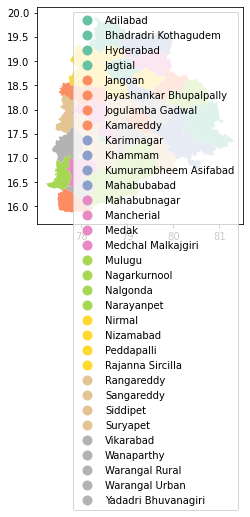

In [8]:
soil_df.plot(column = 'Dist_Name', cmap='Set2', legend=True)
plt.show()

In [9]:
# Creating a GeoDataFrame from a DataFrame
# from shapely.geometry import Point

market_yards['geometry'] = market_yards.apply(lambda x: Point((x.longitude, x.latitude)), axis = 1)
print(market_yards.head(3))

# Now we have a geometry column, we can build a GeoDataFrame from this

marketyards_geo = gpd.GeoDataFrame(market_yards, geometry = market_yards.geometry, crs = {'init': 'epsg:4326'})
#marketyards_geo.crs = "EPSG:4326"
marketyards_geo.head(3)


#market_yards_crs = {'init:': 'epsg:4326'}
#marketyards_geo = gpd.GeoDataFrame(market_yards, crs = market_yards_crs, geometry = market_yards.geometry)


# So we just changed the datatype from a DataFrame to a GeoDataFrame
#gdf = gdf.set_crs(4326, allow_override=True)
#marketyards_geo.set_crs(epsg=4326)

      district              capacity          name   latitude  longitude  \
0  Ranga Reddy  Godown,  5000 MT's        Moinabad  17.333267  78.288869   
1  Ranga Reddy    Godown,  2500 MT's  Shankarpally  17.451972  78.132948   
2  Ranga Reddy    Godown,  5000 MT's      Chevella  17.310470  78.139780   

                              geometry  
0  POINT (78.28886900000001 17.333267)  
1          POINT (78.132948 17.451972)  
2            POINT (78.13978 17.31047)  


c:\Users\Lenovo\anaconda3\envs\thesis\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,district,capacity,name,latitude,longitude,geometry
0,Ranga Reddy,"Godown, 5000 MT's",Moinabad,17.333267,78.288869,POINT (78.28887 17.33327)
1,Ranga Reddy,"Godown, 2500 MT's",Shankarpally,17.451972,78.132948,POINT (78.13295 17.45197)
2,Ranga Reddy,"Godown, 5000 MT's",Chevella,17.310470,78.139780,POINT (78.13978 17.31047)


In [10]:
# Decimal degrees are used to measure the distance from the reference points: the Prime Meridian and the Equator
# We can convert the geometry to measure distance in meters, using to_crs()
# The original longitude and latitude columns remain in decimal degree units
# Convert geometry from decimal degrees to meters
marketyards_geo.crs = "EPSG:4326"
marketyards_geo.geometry = marketyards_geo.geometry.to_crs(epsg = 3857)
marketyards_geo.head(2)

#Convert geometry from decimal degrees to meters
#fires_data_geo.geometry = fires_data_geo.geometry.to_crs(epsg = 3857)
#fires_data_geo.head()

#art['geometry'] = art.apply(lambda x: Point(float(x.lng), float(x.lat)), axis=1)
#art_geo = gpd.GeoDataFrame(art, crs = neighborhoods.crs, geometry = art.geometry)
#print(type(art_geo))

,district,capacity,name,latitude,longitude,geometry
0,Ranga Reddy,"Godown, 5000 MT's",Moinabad,17.333267,78.288869,POINT (8715077.032 1959654.031)
1,Ranga Reddy,"Godown, 2500 MT's",Shankarpally,17.451972,78.132948,POINT (8697719.986 1973501.329)


Spatial joins
gpd.sjoin(name1_gdf, name2_gdf, op = <operation>) 
op = intersects, contains or within

In [11]:

# Returns all observations where the region intersects the points
intersect_gdf = gpd.sjoin(boundaries_df, marketyards_geo, op = 'intersects') # First input POINT, second input POLYGON geometry
print('Points which are completely within this region', intersect_gdf.shape[0]) 
# Number of market yards that intersect a district
# Number of market yards within a district
# Returns all observations where the region completely contains points (so not on boundary anymore)
contains_gdf = gpd.sjoin(boundaries_df, marketyards_geo, op = 'contains')
print('Points which are completely within this region', contains_gdf.shape[0]) 
# Number of districts that contain market yards 
# No cases where the region is completely in a point, but reverse order to get points within the region
within_gdf = gpd.sjoin(marketyards_geo, boundaries_df, op = 'within')
# Adjust the number to get it for another region
print('Points which are completely within this region', within_gdf.shape[0]) 
# Number of market yards within a district
within_gdf.head()
# Index right: the position of the joined data in the original right-hand GDF (here boundaries_df)
# Row index values for the left-hand GDF are retained as the new row indices for within_gdf
print(within_gdf.columns)
print(within_gdf.shape)

Points which are completely within this region 0
Points which are completely within this region 0
Points which are completely within this region 0
Index(['district', 'capacity', 'name', 'latitude', 'longitude', 'geometry',
       'index_right', 'Area', 'Shape_Leng', 'Shape_Area', 'No_HH', 'TOT_P',
       'TOT_M', 'TOT_F', 'P_06', 'M_06', 'F_06', 'P_SC', 'M_SC', 'F_SC',
       'P_ST', 'M_ST', 'F_ST', 'Dist_Name'],
      dtype='object')
(0, 24)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5552\51916823.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:3857

  intersect_gdf = gpd.sjoin(boundaries_df, marketyards_geo, op = 'intersects') # First input POINT, second input POLYGON geometry
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5552\51916823.py:7: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:3857

  contains_gdf = gpd.sjoin(boundaries_df, marketyards_geo, op = 'contains')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5552\51916823.py:11: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries 

#within_gdf.district_left = boundaries_district
#within_gdf.district_right = market_yards_district
#within_gdf[['boundaries_district', 'market_yards_district']].groupby('market_yards_district').agg('count').sort_values('boundaries_district', ascending = False)

# Get name and title from neighborhood_art and group by name
neighborhood_art_grouped = neighborhood_art[['name', 'title']].groupby('name')

# Aggregate the grouped data and count the artworks within each polygon
print(neighborhood_art_grouped.agg('count').sort_values(by = 'title', ascending = False))

# Create urban_art from neighborhood_art where the neighborhood name is Urban Residents
urban_art = neighborhood_art.loc[neighborhood_art.name == "Urban Residents"]

# Get just the Urban Residents neighborhood polygon and save it as urban_polygon
urban_polygon = neighborhoods.loc[neighborhoods.name == "Urban Residents"]

# Plot the urban_polygon as ax 
ax = urban_polygon.plot(color = 'lightgreen')

# Add a plot of the urban_art and show it
urban_art.plot( ax = ax, column = 'type', legend = True);
plt.show()

You can think of a GeoSeries as the geometry column of a GeoDataFrame.
GeoSeries.area: returns the area of each geometry in GeoSeries
GeoSeries.centroid: returns the center point of each geometry in a GeoSeries
GeoSeries.distance(other): returns the minimum distance to a location specified using the 'other'argument 



In [12]:
# Area of first polygon in districts (units correspond to units given)
print(boundaries_df.head(4))
print(boundaries_df.geometry[0].area)
print('There are ', boundaries_df.shape[0], ' districts.')
# [0] for rows, [1] for columns

          Area  Shape_Leng     Shape_Area     No_HH      TOT_P     TOT_M  \
0  6974.142517    5.810776  697414.251698  279190.0  1115724.0  555120.0   
1  2853.088839    2.739430  285308.883913  253619.0   985417.0  484079.0   
2  2112.708002    2.828196  211270.800170  131395.0   534991.0  267875.0   
3  4189.022904    4.657889  418902.290394   78239.0   294671.0  146205.0   

      TOT_F      P_06     M_06     F_06      P_SC     M_SC     F_SC      P_ST  \
0  560601.0  107326.0  54647.0  52676.0  143482.0  71281.0  72201.0  392034.0   
1  501338.0   93272.0  47890.0  45382.0  164596.0  80254.0  84342.0   23351.0   
2  267116.0   52085.0  26914.0  25171.0  112256.0  56347.0  55909.0   62224.0   
3  148466.0   29144.0  14788.0  14356.0   46473.0  23490.0  22983.0   86352.0   

       M_ST      F_ST             Dist_Name  \
0  194349.0  197683.0  Bhadradri Kothagudem   
1   11562.0   11789.0               Jagtial   
2   31570.0   30654.0               Jangoan   
3   42146.0   44206.0    

In [13]:
# Calculate area of each district
# EPSG: 4326 uses decimal degrees for distance (so areas are decimal degrees squared)
#boundaries_df.geometry.to_crs(4326)
district_area = boundaries_df.geometry.area
# Print the areas and crs used
print(district_area.sort_values(ascending = False))
print(boundaries_df.crs)

11    0.612043
0     0.594427
10    0.540845
25    0.423903
30    0.386556
6     0.381761
16    0.379348
3     0.358195
13    0.356541
28    0.342293
8     0.335476
12    0.319792
4     0.315883
17    0.310161
18    0.306836
26    0.304381
7     0.302547
22    0.291043
31    0.252161
1     0.244449
9     0.236097
32    0.232620
24    0.216950
23    0.201101
14    0.187977
19    0.183562
20    0.182557
5     0.181903
2     0.179988
15    0.162212
21    0.110466
27    0.092554
29    0.015515
dtype: float64
epsg:4326


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5552\2164558145.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  district_area = boundaries_df.geometry.area


# NOTE: The coordinate references system decides upon the distance units

In [14]:
# Now, kilometers squared. Use CRS that uses meters for distance. Later convert to km.
boundaries_df_3857 = boundaries_df.to_crs(epsg = 3857)
sqm_to_sqkm = 10**6
district_area_km = boundaries_df_3857.geometry.area / sqm_to_sqkm
print(district_area_km.sort_values(ascending = False))
print(boundaries_df_3857.crs)

11    7925.886888
0     7731.810359
10    6986.069118
25    5496.954407
30    5077.308416
6     4952.272319
16    4936.895327
3     4674.976628
13    4664.592705
28    4500.405178
8     4396.609294
12    4194.107234
4     4123.581715
17    4041.555364
18    3981.530735
26    3945.982565
7     3934.738390
22    3780.734803
31    3295.120908
1     3200.590339
9     3075.532511
32    3010.468651
24    2797.807587
23    2601.089136
14    2458.090161
20    2377.650540
5     2375.328059
19    2369.888262
2     2341.921268
15    2118.754515
21    1439.545451
27    1202.880401
29     201.475505
dtype: float64
epsg:3857


In [15]:
# NOTE: Use 3857 instead of 4326 (projected instead of geo)
boundaries_df_3857['center'] = boundaries_df_3857.geometry.centroid
# Create GDF with districts and centers
part = ['Dist_Name', 'center']
boundaries_df_3857_centers = boundaries_df_3857[part]
boundaries_df_3857_centers.head(3)

,Dist_Name,center
0,Bhadradri Kothagudem,POINT (8983966.931 2001274.695)
1,Jagtial,POINT (8780411.030 2135386.030)
2,Jangoan,POINT (8824975.932 2008397.093)


In [16]:
district_Maha = boundaries_df_3857.loc[boundaries_df_3857.Dist_Name == 'Mahabubabad']
district_Maha.head()
marketyards_geo.head() # GDF for the market yards (see previous derivation)
marketyards_geo_3857 = marketyards_geo.to_crs(epsg = 3857)
# Spatial join market yards within district Mahabubabad
# Finds market yards that are within district Mahabubabad
yards_in_Maha = gpd.sjoin(marketyards_geo_3857, district_Maha, op = 'within')
yards_in_Maha.shape # There are 7 schools in district Mahabubabad

(7, 25)

In [17]:
# Distances dictionary that includes the distance from the center of the district to each market yard in the district 
distances = {}
for row in yards_in_Maha.iterrows():
    vals = row[1]
    key = vals['name']
    ctr = vals['center']
    distances[key] = vals['geometry'].distance(ctr)
pprint.pprint(distances)# NOTE: Use 3857 instead of 4326 (projected instead of geo)
boundaries_df_3857['center'] = boundaries_df_3857.geometry.centroid
# Create GDF with districts and centers
part = ['Dist_Name', 'center']
boundaries_df_3857_centers = boundaries_df_3857[part]
boundaries_df_3857_centers.head(3)

{'Gudur/ Nekkonda': 15384.164322352202,
 'Kesamudram': 11096.838787510733,
 'Mahabubabad': 8862.520960327322,
 'Mahabubabad/ Dornakal ': 31783.766963849735,
 'Maripeda/ Kesamudram': 37861.54178413947,
 'Thorrur': 27146.50570074546,
 'Thorrur /                   Nellikudur ': 14664.559203866105}


,Dist_Name,center
0,Bhadradri Kothagudem,POINT (8983966.931 2001274.695)
1,Jagtial,POINT (8780411.030 2135386.030)
2,Jangoan,POINT (8824975.932 2008397.093)


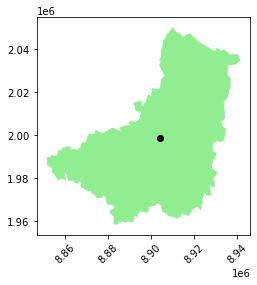

In [18]:

# NOTE: Use 3857 instead of 4326 (projected instead of geo)
district_Maha = boundaries_df_3857.loc[boundaries_df_3857.Dist_Name == 'Mahabubabad']
center_Maha = district_Maha.geometry.centroid

# Plot the urban_poly_3857 as ax and add the center point
ax = district_Maha.plot(color = 'lightgreen')
center_Maha.plot(ax = ax, color = 'black')
plt.xticks(rotation = 45)
# Show the plot
plt.show()

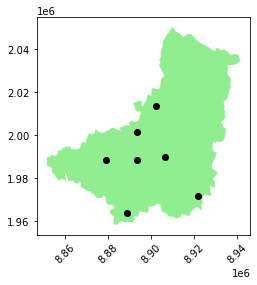

In [19]:
district_Maha = boundaries_df_3857.loc[boundaries_df_3857.Dist_Name == 'Mahabubabad']
center_Maha = district_Maha.geometry.centroid
# Finds market yards that are within district Mahabubabad
yards_in_Maha = gpd.sjoin(marketyards_geo_3857, district_Maha, op = 'within')
# Plot the urban_poly_3857 as ax and add the center point
ax = district_Maha.plot(color = 'lightgreen')
yards_in_Maha.plot(ax = ax, color = 'black')
plt.xticks(rotation = 45)
# Show the plot
plt.show()

In [20]:
# Create art_dist_meters using art and the geometry from art
district_exercise = boundaries_df.loc[boundaries_df.Dist_Name == 'Mahabubabad']
boundaries_exercise = gpd.GeoDataFrame(district_exercise, geometry = district_exercise.geometry, crs = {'init': 'epsg:4326'})
print(boundaries_exercise.head(2))
#Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries.
# Set the crs of art_dist_meters to use EPSG:3857
boundaries_exercise.geometry = boundaries_exercise.geometry.to_crs(epsg = 3857)
print(boundaries_df.head(2))

# Add a column to art_meters, center
boundaries_exercise['center'] = center_Maha

          Area  Shape_Leng     Shape_Area     No_HH     TOT_P     TOT_M  \
7  3551.035197     3.66165  355103.519706  195889.0  774549.0  388058.0   

      TOT_F     P_06     M_06     F_06      P_SC     M_SC     F_SC      P_ST  \
7  386491.0  81082.0  42610.0  38472.0  104508.0  51961.0  52547.0  292778.0   

       M_ST      F_ST    Dist_Name  \
7  148139.0  144639.0  Mahabubabad   

                                            geometry  
7  POLYGON ((79.53656 17.60128, 79.53806 17.60034...  
          Area  Shape_Leng     Shape_Area     No_HH      TOT_P     TOT_M  \
0  6974.142517    5.810776  697414.251698  279190.0  1115724.0  555120.0   
1  2853.088839    2.739430  285308.883913  253619.0   985417.0  484079.0   

      TOT_F      P_06     M_06     F_06      P_SC     M_SC     F_SC      P_ST  \
0  560601.0  107326.0  54647.0  52676.0  143482.0  71281.0  72201.0  392034.0   
1  501338.0   93272.0  47890.0  45382.0  164596.0  80254.0  84342.0   23351.0   

       M_ST      F_ST       

c:\Users\Lenovo\anaconda3\envs\thesis\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5552\45452782.py:3: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  boundaries_exercise = gpd.GeoDataFrame(district_exercise, geometry = district_exercise.geometry, crs = {'init': 'epsg:4326'})


In [21]:
# Folium wants coordinates as an array with latitude first
boundaries_df.head()
district_Maha_fol = boundaries_df.loc[boundaries_df.Dist_Name == 'Mahabubabad']
print(district_Maha_fol.head())
district_Maha_fol['center'] = district_Maha_fol.geometry.centroid
type(district_Maha_fol.center)
# Create an array of the center of the district
center_Maha = district_Maha_fol['center'].iloc[0]
print(center_Maha)
print(type(center_Maha))
# Reverse the order of the coordinate pair for folium
district_center = [center_Maha.y, center_Maha.x]
print(district_center)
# Create a folium map centered on the Maha district
district_map = folium.Map(location = district_center, zoom_start = 12)
# Add the outline of the Maha district
folium.GeoJson(district_Maha_fol.geometry).add_to(district_map)
# Display the resulting map
display(district_map)


          Area  Shape_Leng     Shape_Area     No_HH     TOT_P     TOT_M  \
7  3551.035197     3.66165  355103.519706  195889.0  774549.0  388058.0   

      TOT_F     P_06     M_06     F_06      P_SC     M_SC     F_SC      P_ST  \
7  386491.0  81082.0  42610.0  38472.0  104508.0  51961.0  52547.0  292778.0   

       M_ST      F_ST    Dist_Name  \
7  148139.0  144639.0  Mahabubabad   

                                            geometry  
7  POLYGON ((79.53656 17.60128, 79.53806 17.60034...  
POINT (79.98686441492848 17.66524112123727)
<class 'shapely.geometry.point.Point'>
[17.665241121237266, 79.98686441492848]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5552\2772750895.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  district_Maha_fol['center'] = district_Maha_fol.geometry.centroid
c:\Users\Lenovo\anaconda3\envs\thesis\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [22]:
for row in yards_in_Maha.iterrows():
    row_values = row[1]
    #print(row_values)
    location = [row_values['latitude'], row_values['longitude']]
    print(location)
    # Create popups inside the loop you built to create the markers
    # Here we bould a popup message that includes the name
    popup = popup = '<strong>' + row_values['name'] + '</strong>'
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(district_map)
display(district_map)

# Other popup example
#popup = (str(row_values['title']) + ': ' + str(row_values['desc'])).replace("'", "`")

# Two common issues:
# missing values and single/double quotes in the data itself

# Replace Nan and ' values in description
#urban_art.desc.fillna('', inplace = True)
#urban_art.desc = urban_art.desc.str.replace("'", "`")





[17.592803, 80.009655]
[17.438187, 80.144006]
[17.689503, 79.890492]
[17.580084, 79.760163]
[17.580014, 79.890492]
[17.796071, 79.969213]
[17.368325, 79.850745]


In [23]:
boundaries_df.Dist_Name = boundaries_df.Dist_Name.str.replace(" ", "")
marketyards_geo.district = marketyards_geo.district.str.replace(" ", "")
marketyards_geo.head()

# Count the number of yards within each district
yards_counts = marketyards_geo.groupby(['district']).size()
yards_counts
boundaries_df.head()
# Add these counts to the GDF
yards_counts_df = yards_counts.to_frame()
yards_counts_df = yards_counts_df.reset_index() # .reset_index(inplace=True)
yards_counts_df.columns = ['Dist_Name', 'yards_count'] # Assign a name to each column
districts_with_counts = pd.merge(boundaries_df, yards_counts_df, on = 'Dist_Name')
print(districts_with_counts.head(2))

          Area  Shape_Leng     Shape_Area     No_HH      TOT_P     TOT_M  \
0  3701.834985    4.296472  370183.498474  222513.0   972625.0  478389.0   
1  2127.790076    2.875977  212779.007627  258485.0  1005711.0  504620.0   

      TOT_F      P_06     M_06     F_06      P_SC     M_SC     F_SC     P_ST  \
0  494236.0  111666.0  57528.0  54138.0  153302.0  74133.0  79169.0  81656.0   
1  501091.0   89079.0  46124.0  42955.0  186648.0  93792.0  92856.0  12779.0   

      M_ST     F_ST   Dist_Name  \
0  40818.0  40838.0   Kamareddy   
1   6485.0   6294.0  Karimnagar   

                                            geometry  yards_count  
0  POLYGON ((78.52433 18.46778, 78.52439 18.46766...           19  
1  POLYGON ((79.01273 18.67556, 79.01406 18.67288...            8  


In [24]:
# Normalize
# Store the area for each district
districts_with_counts['area'] = districts_with_counts.geometry.area
# Divide the counts by the areas (so we create a density column)
districts_with_counts['yards_density'] = districts_with_counts.apply(
    lambda row: row.yards_count/row.area, axis = 1)
districts_with_counts.head(2)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5552\4077554368.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  districts_with_counts['area'] = districts_with_counts.geometry.area


,Area,Shape_Leng,Shape_Area,No_HH,TOT_P,TOT_M,TOT_F,P_06,M_06,F_06,...,M_SC,F_SC,P_ST,M_ST,F_ST,Dist_Name,geometry,yards_count,area,yards_density
0,3701.834985,4.296472,370183.498474,222513.0,972625.0,478389.0,494236.0,111666.0,57528.0,54138.0,...,74133.0,79169.0,81656.0,40818.0,40838.0,Kamareddy,"POLYGON ((78.52433 18.46778, 78.52439 18.46766...",19,0.315883,60.148847
1,2127.790076,2.875977,212779.007627,258485.0,1005711.0,504620.0,501091.0,89079.0,46124.0,42955.0,...,93792.0,92856.0,12779.0,6485.0,6294.0,Karimnagar,"POLYGON ((79.01273 18.67556, 79.01406 18.67288...",8,0.181903,43.979532


In [25]:
# 4326: uses deciaml degrees for distance
# 3857: uses meters for distance
print(boundaries_df.crs) # Check whether we have crs 3857
# If not, use the following: .to_crs(epsg = 3857)
print(boundaries_df_3857.crs) # Check whether we have crs 3857
sqm_to_sqkm = 10**6 # define a variable for m^2 to km^2
boundaries_df_3857['area'] = boundaries_df_3857.geometry.area / sqm_to_sqkm
boundaries_df_3857.head(5)
# Now also latitude and longitude measures are in meters instead of decimal degrees (traditional)

epsg:4326
epsg:3857


,Area,Shape_Leng,Shape_Area,No_HH,TOT_P,TOT_M,TOT_F,P_06,M_06,F_06,P_SC,M_SC,F_SC,P_ST,M_ST,F_ST,Dist_Name,geometry,center,area
0,6974.142517,5.810776,697414.251698,279190.0,1115724.0,555120.0,560601.0,107326.0,54647.0,52676.0,143482.0,71281.0,72201.0,392034.0,194349.0,197683.0,Bhadradri Kothagudem,"POLYGON ((9000253.115 1992569.133, 9000289.619...",POINT (8983966.931 2001274.695),7731.810359
1,2853.088839,2.739430,285308.883913,253619.0,985417.0,484079.0,501338.0,93272.0,47890.0,45382.0,164596.0,80254.0,84342.0,23351.0,11562.0,11789.0,Jagtial,"POLYGON ((8793003.673 2163661.457, 8793208.815...",POINT (8780411.030 2135386.030),3200.590339
2,2112.708002,2.828196,211270.800170,131395.0,534991.0,267875.0,267116.0,52085.0,26914.0,25171.0,112256.0,56347.0,55909.0,62224.0,31570.0,30654.0,Jangoan,"POLYGON ((8815448.329 2037476.639, 8815455.303...",POINT (8824975.932 2008397.093),2341.921268
3,4189.022904,4.657889,418902.290394,78239.0,294671.0,146205.0,148466.0,29144.0,14788.0,14356.0,46473.0,23490.0,22983.0,86352.0,42146.0,44206.0,Mulugu,"POLYGON ((8888181.244 2056242.729, 8888214.875...",POINT (8943173.396 2071607.525),4674.976628
4,3701.834985,4.296472,370183.498474,222513.0,972625.0,478389.0,494236.0,111666.0,57528.0,54138.0,153302.0,74133.0,79169.0,81656.0,40818.0,40838.0,Kamareddy,"POLYGON ((8741287.890 2092374.586, 8741294.979...",POINT (8689956.235 2075783.537),4123.581715


In [26]:
# Reconvert crs back to 4326
boundaries_df_back_4326 = boundaries_df_3857.to_crs(epsg = 4326)
print(boundaries_df_back_4326.crs)
# Now, area is in km^2 and geometry in decimal degrees
print(boundaries_df_back_4326.head(2))

epsg:4326
          Area  Shape_Leng     Shape_Area     No_HH      TOT_P     TOT_M  \
0  6974.142517    5.810776  697414.251698  279190.0  1115724.0  555120.0   
1  2853.088839    2.739430  285308.883913  253619.0   985417.0  484079.0   

      TOT_F      P_06     M_06     F_06      P_SC     M_SC     F_SC      P_ST  \
0  560601.0  107326.0  54647.0  52676.0  143482.0  71281.0  72201.0  392034.0   
1  501338.0   93272.0  47890.0  45382.0  164596.0  80254.0  84342.0   23351.0   

       M_ST      F_ST             Dist_Name  \
0  194349.0  197683.0  Bhadradri Kothagudem   
1   11562.0   11789.0               Jagtial   

                                            geometry  \
0  POLYGON ((80.85065 17.61530, 80.85098 17.61340...   
1  POLYGON ((78.98890 19.07410, 78.99074 19.07366...   

                            center         area  
0  POINT (8983966.931 2001274.695)  7731.810359  
1  POINT (8780411.030 2135386.030)  3200.590339  


In [27]:
marketyards_geo = marketyards_geo.to_crs(epsg = 4326)
print(marketyards_geo.crs)
# Spatial join to get the districts that contain the yards
yards_in_districts = gpd.sjoin(boundaries_df_back_4326, marketyards_geo, op = 'contains')
print(yards_in_districts.head(2))
#print(boundaries_df_back_4326.head(2))
#print(marketyards_geo.head(2))


epsg:4326
          Area  Shape_Leng     Shape_Area     No_HH      TOT_P     TOT_M  \
0  6974.142517    5.810776  697414.251698  279190.0  1115724.0  555120.0   
0  6974.142517    5.810776  697414.251698  279190.0  1115724.0  555120.0   

      TOT_F      P_06     M_06     F_06  ...             Dist_Name  \
0  560601.0  107326.0  54647.0  52676.0  ...  Bhadradri Kothagudem   
0  560601.0  107326.0  54647.0  52676.0  ...  Bhadradri Kothagudem   

                                            geometry  \
0  POLYGON ((80.85065 17.61530, 80.85098 17.61340...   
0  POLYGON ((80.85065 17.61530, 80.85098 17.61340...   

                            center         area  index_right    district  \
0  POINT (8983966.931 2001274.695)  7731.810359          227  Kothagudem   
0  POINT (8983966.931 2001274.695)  7731.810359          221  Kothagudem   

             capacity              name   latitude  longitude  
0     5000MT Godown    Julurpad/ Enkoor  17.392638  80.498443  
0  Godown,  2500 MT's   

In [28]:
# Aggregate to get counts
yards_counts_choropleths = yards_in_districts.groupby(['district']).size()
#print(yards_counts_choropleths)

# Convert this to a df
yards_counts_choropleths_df = yards_counts_choropleths.to_frame()
yards_counts_choropleths_df = yards_counts_choropleths_df.reset_index(level=0)
yards_counts_choropleths_df.columns = ['Dist_Name', 'yards_count']
yards_counts_choropleths_df.head(2)


,Dist_Name,yards_count
0,Adilabad,10
1,Gadwal(Jogulamba),9


In [29]:
# merge
# Because we list the GeoDF first, the resulting merged object is also a GeoDF. Otherwise DF.
districts_with_counts = pd.merge(boundaries_df_back_4326, yards_counts_choropleths_df, on = 'Dist_Name')
districts_with_counts.head()

# Create the yards_density
districts_with_counts['yards_density'] = districts_with_counts.apply(lambda row: row.yards_count / row.area, axis = 1)
districts_with_counts.head()


,Area,Shape_Leng,Shape_Area,No_HH,TOT_P,TOT_M,TOT_F,P_06,M_06,F_06,...,F_SC,P_ST,M_ST,F_ST,Dist_Name,geometry,center,area,yards_count,yards_density
0,3701.834985,4.296472,370183.498474,222513.0,972625.0,478389.0,494236.0,111666.0,57528.0,54138.0,...,79169.0,81656.0,40818.0,40838.0,Kamareddy,"POLYGON ((78.52433 18.46778, 78.52439 18.46766...",POINT (8689956.235 2075783.537),4123.581715,18,0.004365
1,2127.790076,2.875977,212779.007627,258485.0,1005711.0,504620.0,501091.0,89079.0,46124.0,42955.0,...,92856.0,12779.0,6485.0,6294.0,Karimnagar,"POLYGON ((79.01273 18.67556, 79.01406 18.67288...",POINT (8820786.242 2082106.827),2375.328059,5,0.002105
2,4491.247740,5.640977,449124.773955,382929.0,1401639.0,699124.0,702515.0,139614.0,71760.0,67854.0,...,140499.0,199342.0,99808.0,99534.0,Khammam,"POLYGON ((80.91930 17.21950, 80.91868 17.21933...",POINT (8945245.450 1944042.473),4952.272319,9,0.001817
3,3551.035197,3.661650,355103.519706,195889.0,774549.0,388058.0,386491.0,81082.0,42610.0,38472.0,...,52547.0,292778.0,148139.0,144639.0,Mahabubabad,"POLYGON ((79.53656 17.60128, 79.53806 17.60034...",POINT (8904106.298 1998435.792),3934.738390,7,0.001779
4,3909.400107,4.304491,390940.010715,206938.0,806808.0,408165.0,398643.0,73690.0,38563.0,35127.0,...,98701.0,56740.0,28776.0,27964.0,Mancherial,"POLYGON ((79.93091 19.15612, 79.92990 19.15534...",POINT (8851806.877 2154194.408),4396.609294,10,0.002274


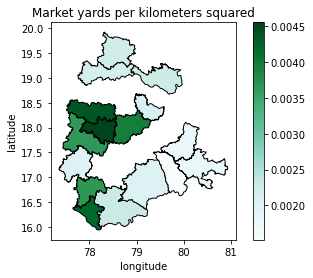

In [30]:
# Create choropleth plot
districts_with_counts.plot(column = 'yards_density', cmap = 'BuGn', edgecolor = 'black', legend = True)
plt.title('Market yards per kilometers squared')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

# Arguments of the folium choropleth
geo_data: the source data for the polygons (geojson file or a GeoDF)
name: the name of hte geometry column (or geojson property) for the polygons
data: the source DF or Series for the normalized data
columns: a list of columns: one that corresponds to the polygons and one that has the value to plot

key_on: a GeoJSON variable to bind the data to (always start with 'feature')
fill_color: polygon fill color (default blue)
fill_opacity: range between 0 (transparent) and 1 (completely opaque)
line_color: color of polygon border lines (defaults to black)
line_opacity: range between 0 (transparent) and 1 (completely opaque)


In [31]:
# Center point and map
center = [center_Maha.y, center_Maha.x]
m = folium.Map(location = center, zoom_start = 10)
print(districts_with_counts.head())
cds = ColumnDataSource(districts_with_counts.drop(columns=['geometry']))
# Define a choropleth layer for the map
m.choropleth(
    geo_data = districts_with_counts,
    name = 'geometry',
    data = districts_with_counts,
    columns = ['Dist_Name', 'yards_density'],
    key_on = 'feature.properties.Dist_Name',
    fill_color = 'YlGn',
    fill_opacity = 0.75,
    line_opacity = 0.5,
    legend_name = 'Yards per km squared by District'
)

# Add layer control and display
folium.LayerControl().add_to(m)
display(m)

          Area  Shape_Leng     Shape_Area     No_HH      TOT_P     TOT_M  \
0  3701.834985    4.296472  370183.498474  222513.0   972625.0  478389.0   
1  2127.790076    2.875977  212779.007627  258485.0  1005711.0  504620.0   
2  4491.247740    5.640977  449124.773955  382929.0  1401639.0  699124.0   
3  3551.035197    3.661650  355103.519706  195889.0   774549.0  388058.0   
4  3909.400107    4.304491  390940.010715  206938.0   806808.0  408165.0   

      TOT_F      P_06     M_06     F_06  ...      F_SC      P_ST      M_ST  \
0  494236.0  111666.0  57528.0  54138.0  ...   79169.0   81656.0   40818.0   
1  501091.0   89079.0  46124.0  42955.0  ...   92856.0   12779.0    6485.0   
2  702515.0  139614.0  71760.0  67854.0  ...  140499.0  199342.0   99808.0   
3  386491.0   81082.0  42610.0  38472.0  ...   52547.0  292778.0  148139.0   
4  398643.0   73690.0  38563.0  35127.0  ...   98701.0   56740.0   28776.0   

       F_ST    Dist_Name                                           geometr

NameError: name 'ColumnDataSource' is not defined